In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,
cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,
mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor


In [2]:
df = pd.read_csv("house.csv")

In [3]:
df.head()

,name/id,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,A1,1,26.184098,1286.68,204.003817,22,67,96004.80456
1,A2,1,34.866901,1855.25,186.980360,8,30,92473.72257
2,A3,1,36.980709,692.09,111.224999,24,24,98112.51994
3,A4,1,17.445723,1399.49,237.998760,1,66,92118.32687
4,A5,1,52.587646,84.65,100.996399,20,3,98976.65318


In [4]:
df.tail(2)

,name/id,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
4043,Q1,17,750.971604,402.62,40.985933,1,80,118134.7712
4044,Q2,17,644.319019,229.89,-63.470240,1,76,115683.5495


In [5]:
df.shape

(4045, 8)

In [6]:
df.size

32360

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name/id          4045 non-null   object 
 1   bedroom_count    4045 non-null   int64  
 2   net_sqm          4045 non-null   float64
 3   center_distance  4045 non-null   float64
 4   metro_distance   4045 non-null   float64
 5   floor            4045 non-null   int64  
 6   age              4045 non-null   int64  
 7   price            4045 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 252.9+ KB


In [8]:
##dropping name/id
df = df.drop(columns = ["name/id"])

In [9]:
df.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.80456
1,1,34.866901,1855.25,186.980360,8,30,92473.72257


In [10]:
df['net_sqm'] = df['net_sqm'].round(2)

In [11]:
df.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.18,1286.68,204.003817,22,67,96004.80456
1,1,34.87,1855.25,186.980360,8,30,92473.72257


In [12]:
df['metro_distance'] = df['metro_distance'].round(2)

In [13]:
df.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.18,1286.68,204.00,22,67,96004.80456
1,1,34.87,1855.25,186.98,8,30,92473.72257


In [14]:
##removing the negtive sign from metro_distance by converting to string and again to float
df['metro_distance'] = df['metro_distance'].astype(str).str.replace('-', '').astype(float)

In [63]:
df['price'] = df['price'].round(2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4045 non-null   int64  
 1   net_sqm          4045 non-null   float64
 2   center_distance  4045 non-null   float64
 3   metro_distance   4045 non-null   float64
 4   floor            4045 non-null   int64  
 5   age              4045 non-null   int64  
 6   price            4045 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 221.3 KB


In [17]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4045.000000,4045.000000,4045.000000,4045.000000,4045.00000,4045.000000,4045.000000
mean,3.649691,111.628220,1007.115236,96.143439,9.55822,48.360198,95733.956497
std,2.465720,89.459232,578.706749,61.577223,7.70210,28.153029,3770.581750
min,1.000000,-8.500000,10.060000,0.000000,1.00000,0.000000,84153.490000
25%,2.000000,50.170000,510.630000,45.040000,2.00000,24.000000,93199.040000
50%,3.000000,86.380000,1009.410000,89.820000,8.00000,48.000000,95474.250000
75%,5.000000,144.770000,1493.410000,140.510000,16.00000,72.000000,97863.620000
max,17.000000,750.970000,1999.840000,330.280000,24.00000,97.000000,118134.770000


In [18]:
##Plotting Graphs

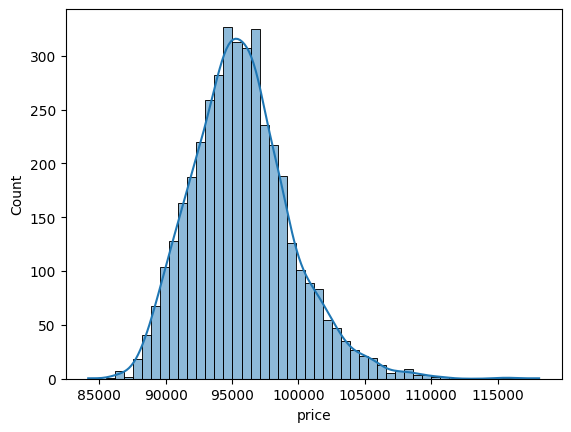

In [19]:
##Histogram pf Price
sns.histplot(x ="price", bins = 50, kde = True , data = df)
plt.show()
### Most of the houses have pricing in the range of 90000-105000

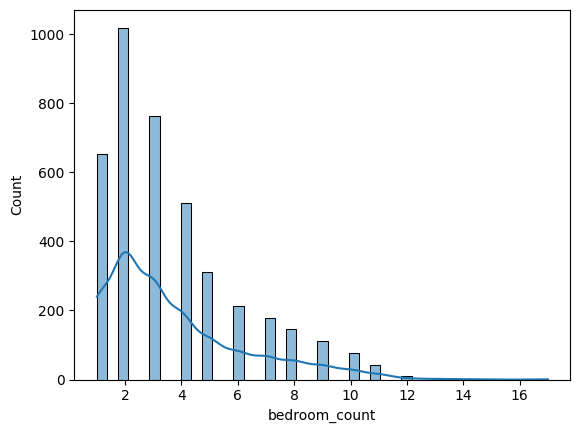

In [20]:
### Histogram of Bedroom counts
sns.histplot(x ="bedroom_count", kde = True , data = df)
plt.show()
### 2 bhk have the hishest frequency/counts in the dataset

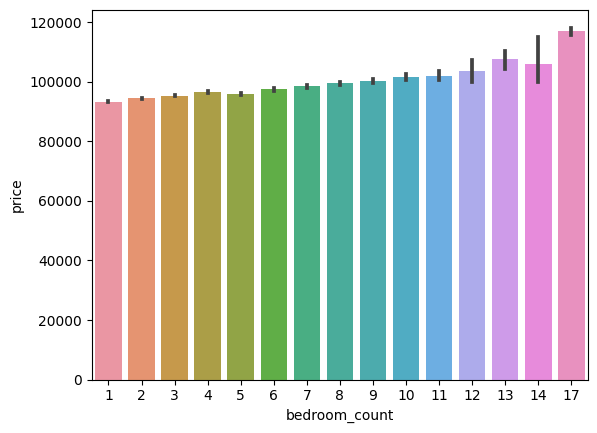

In [21]:
## Pricing vs Bedroom count
sns.barplot(x ="bedroom_count", y ="price" , data = df)
plt.show()
## Most costliest is the 17 bedroom

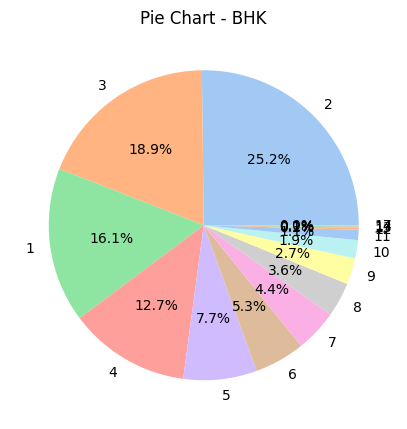

In [22]:
## Pie chart for bedrooms
plt.figure(figsize=(5,20))
df['bedroom_count'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart - BHK')
plt.ylabel('')
plt.show()

<AxesSubplot:xlabel='metro_distance', ylabel='price'>

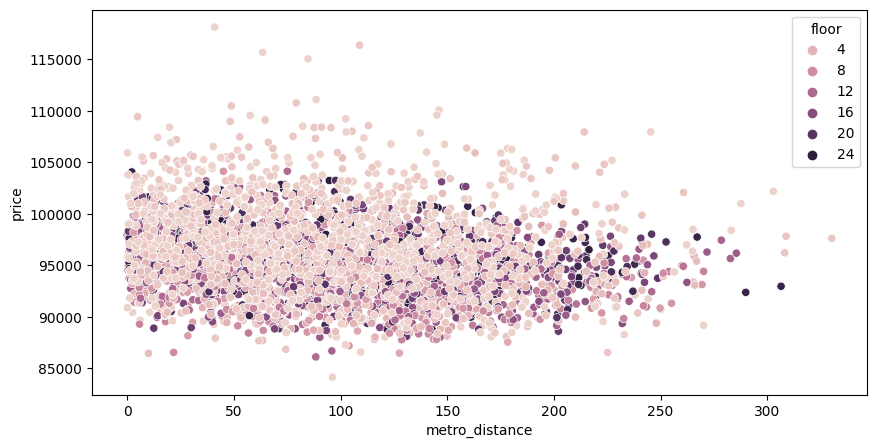

In [23]:
##scatterplot for Distance from Metro and Price with respect to various floors
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'metro_distance', y ='price' , hue = 'floor', data = df)
## As the distance from metro increases, the price drops. 

<AxesSubplot:xlabel='center_distance', ylabel='price'>

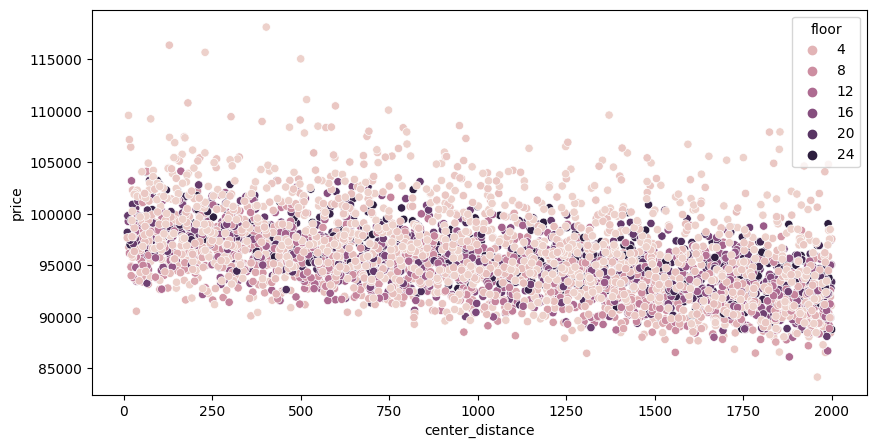

In [24]:
##scatterplot for Distance from Centre and Price with respect to various floors
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'center_distance', y ='price' , hue = 'floor', data = df)
## As the distance from centre increases, the price drops.

<AxesSubplot:xlabel='floor', ylabel='price'>

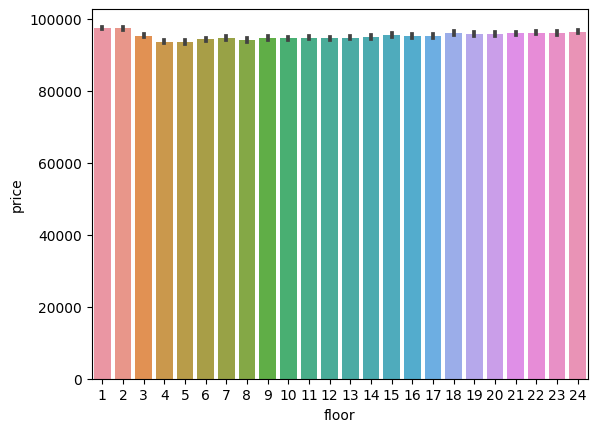

In [25]:
sns.barplot(x = 'floor', y = 'price' , data = df)

<AxesSubplot:xlabel='age', ylabel='price'>

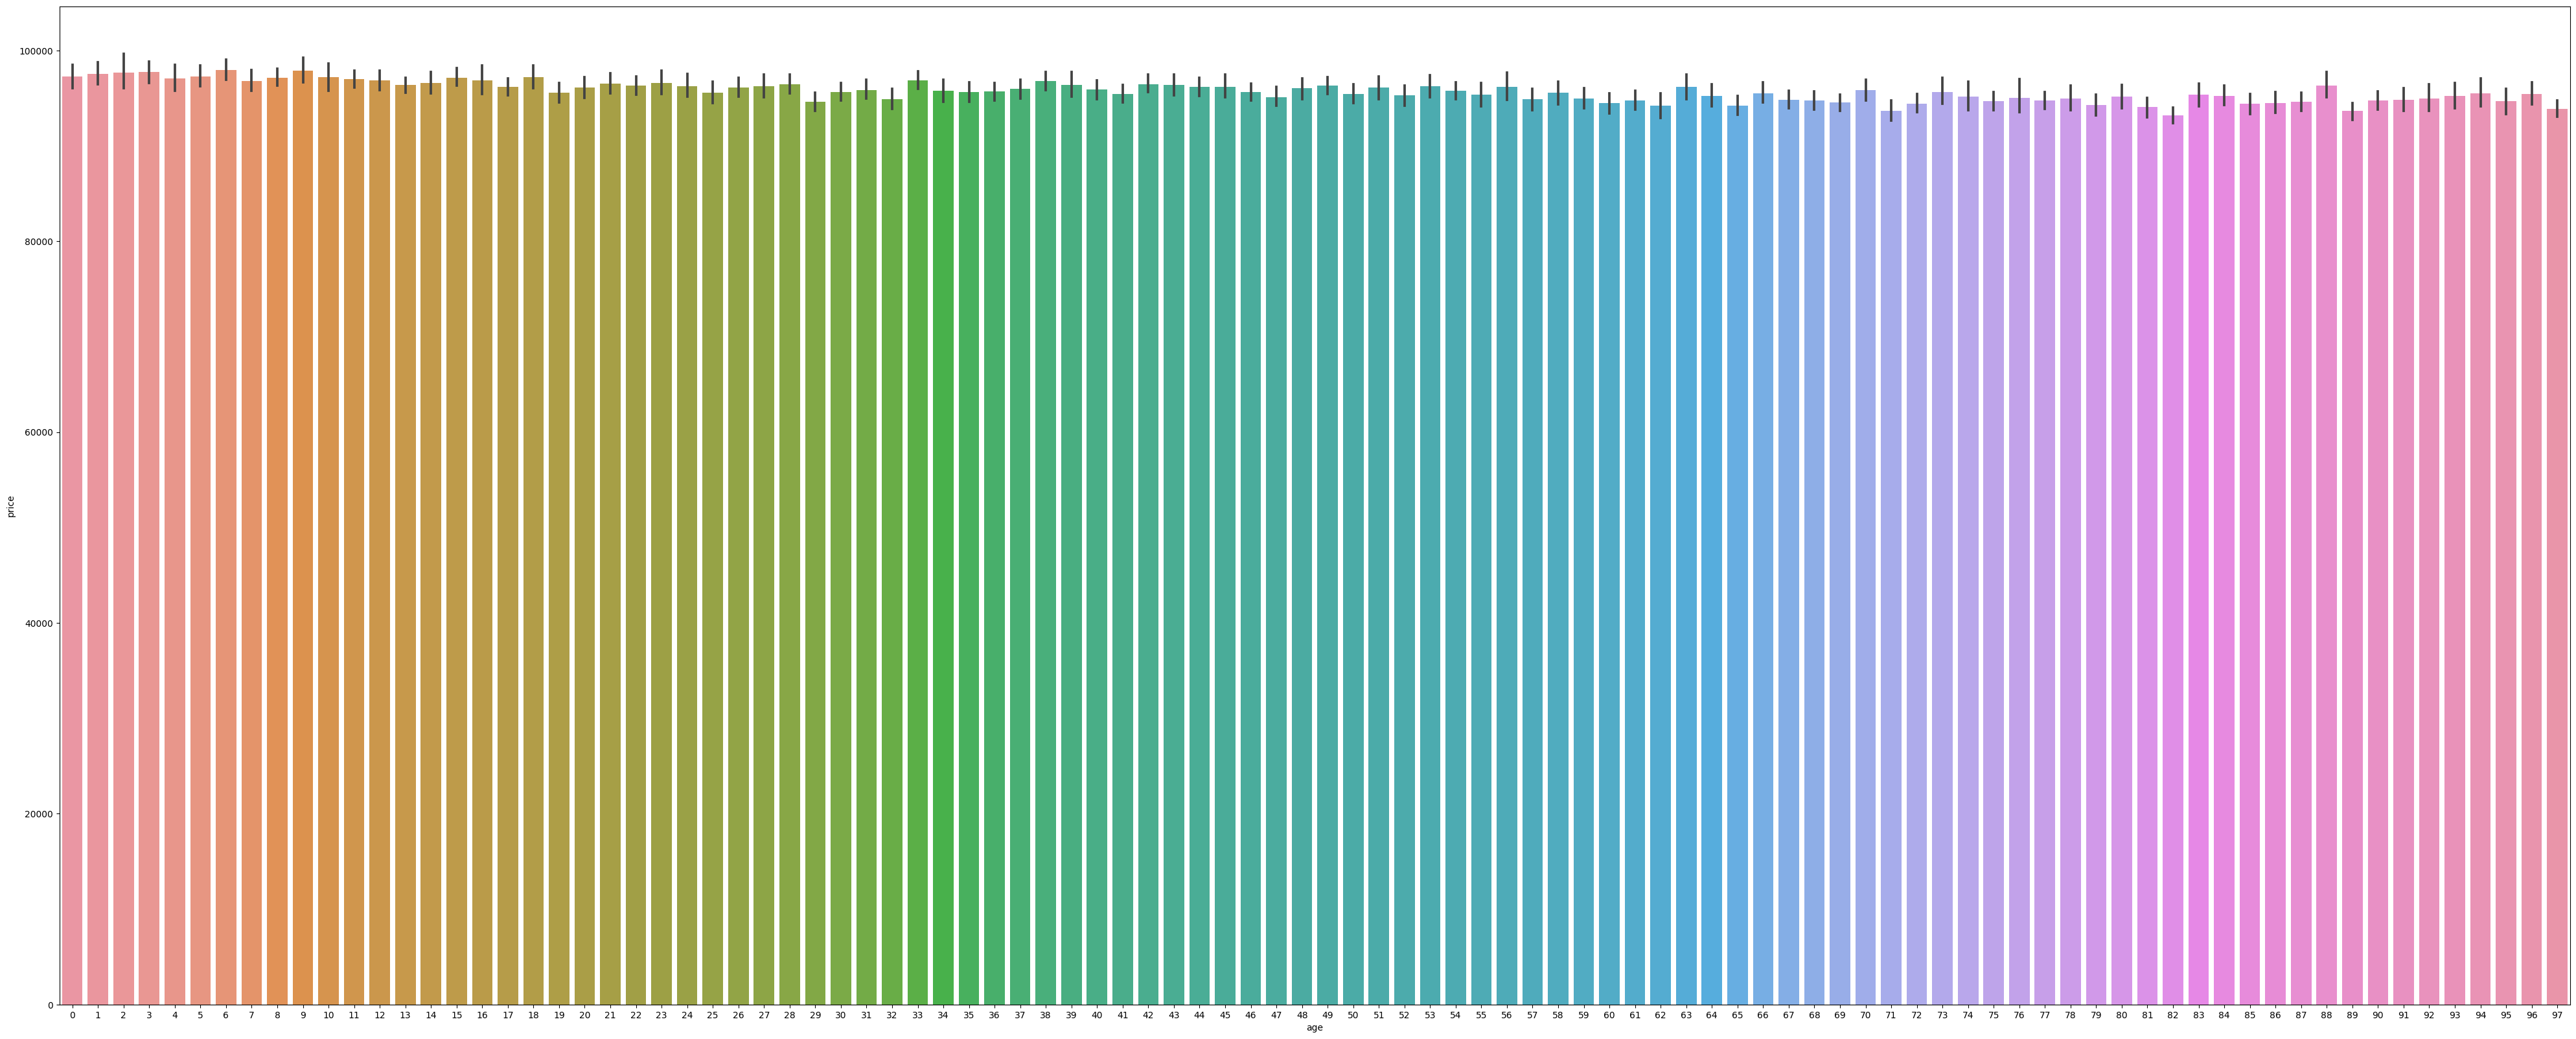

In [26]:
plt.figure(figsize=(50,20))
sns.barplot(x = 'age', y = 'price' , data = df)

In [27]:
#Pricing doesn't get effected majorily by floor or age

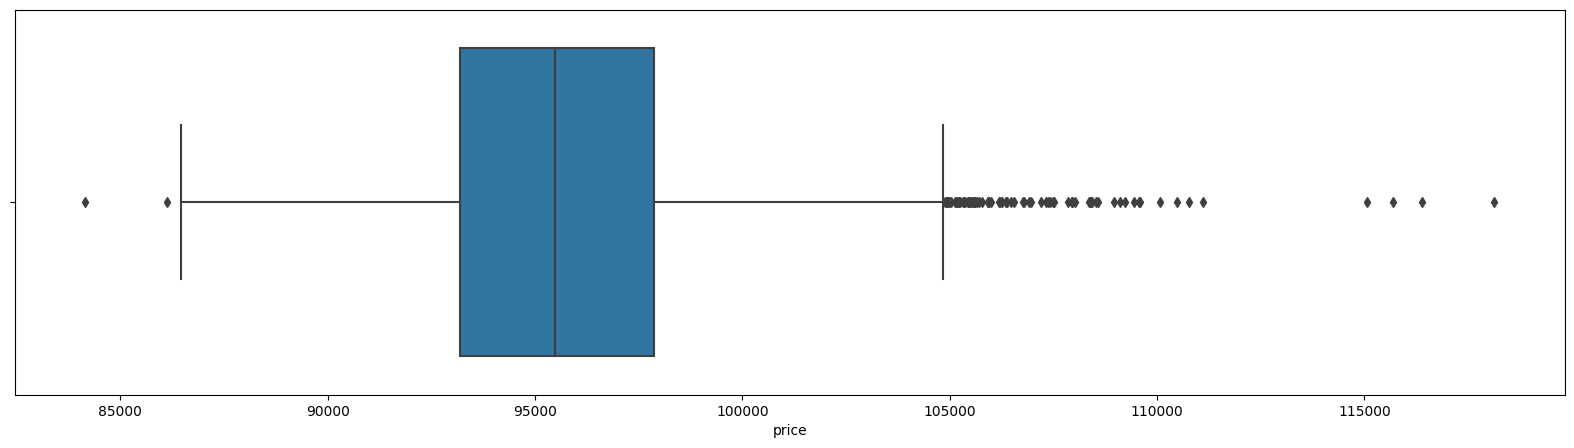

In [28]:
# Box Plot for understanding outliers
plt.figure(figsize=(20, 5))
sns.boxplot(x=df['price'])
plt.xlabel('price')
plt.show()

In [29]:
###Removing outliers
df_num = df.select_dtypes('number')

In [30]:
Q1 = df_num.quantile(.25)
Q3 = df_num.quantile(.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [31]:
lower_bound

bedroom_count         -2.500
net_sqm              -91.730
center_distance     -963.540
metro_distance       -98.165
floor                -19.000
age                  -48.000
price              86202.170
dtype: float64

In [32]:
upper_bound

bedroom_count           9.500
net_sqm               286.670
center_distance      2967.580
metro_distance        283.715
floor                  37.000
age                   144.000
price              104860.490
dtype: float64

In [33]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

<AxesSubplot:xlabel='price'>

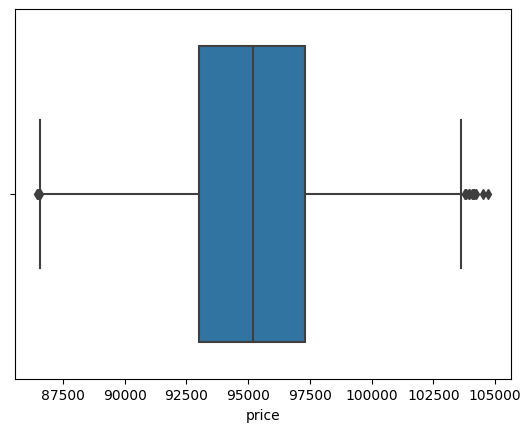

In [34]:
sns.boxplot(x = df['price'])

In [35]:
df_num = df.select_dtypes('number')

In [36]:
Q1 = df_num.quantile(.25)
Q3 = df_num.quantile(.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [37]:
lower_bound

bedroom_count         -1.00000
net_sqm              -72.37250
center_distance     -979.05625
metro_distance       -98.32375
floor                -18.00000
age                  -48.00000
price              86559.32250
dtype: float64

In [38]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

<AxesSubplot:xlabel='price'>

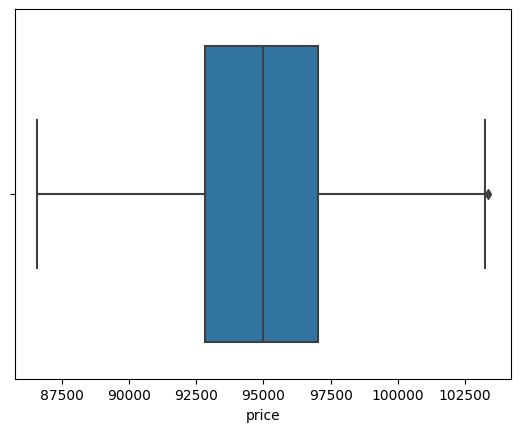

In [39]:
sns.boxplot(x = df['price'])

In [40]:
X = df.drop('price', axis=1)
y = df.price
X.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
0,1,26.18,1286.68,204.00,22,67
1,1,34.87,1855.25,186.98,8,30


In [41]:
X_cat = X.select_dtypes('object')
X_cat.head()

""
0
1
2
3
4


In [42]:
X_num = X.select_dtypes('number')
X_num.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
0,1,26.18,1286.68,204.00,22,67
1,1,34.87,1855.25,186.98,8,30
2,1,36.98,692.09,111.22,24,24
3,1,17.45,1399.49,238.00,1,66
4,1,52.59,84.65,101.00,20,3


In [43]:
### Standardizing numeric scales
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [44]:
type(X_num_scaled)

numpy.ndarray

In [45]:
## Converting to dataframe
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [46]:
X_num_scaled.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
count,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000
mean,0.319266,0.373384,0.501796,0.338795,0.425987,0.500774
std,0.259895,0.208928,0.291957,0.215581,0.327620,0.289467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.212029,0.249020,0.158820,0.086957,0.247423
50%,0.333333,0.334300,0.505855,0.316827,0.391304,0.494845
75%,0.500000,0.497178,0.749475,0.496362,0.695652,0.752577
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
X = X_num_scaled

In [48]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
dtype: int64
0
(3495, 6)
(3495,)


In [49]:
X.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
count,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000
mean,0.319266,0.373384,0.501796,0.338795,0.425987,0.500774
std,0.259895,0.208928,0.291957,0.215581,0.327620,0.289467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.212029,0.249020,0.158820,0.086957,0.247423
50%,0.333333,0.334300,0.505855,0.316827,0.391304,0.494845
75%,0.500000,0.497178,0.749475,0.496362,0.695652,0.752577
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
### Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(2796, 6)
(699, 6)
(2796,)
(699,)


In [52]:
bs = pd.concat([X_train, y_train], axis=1).reset_index().drop(['index'], axis=1)
abc = pd.DataFrame({})
for i in range(3):
    sample = bs.iloc[np.random.randint(0,7,5)].reset_index().drop(['index'], axis=1)
    model = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
    abc[f'sample{i}']=model.predict(X_test)
abc

,sample0,sample1,sample2
0,99244.663333,99244.663333,99244.663333
1,97876.696667,97876.696667,97876.696667
2,95525.290000,95525.290000,95525.290000
3,92417.003333,92417.003333,92417.003333
4,93685.000000,93685.000000,93685.000000
...,...,...,...
694,95563.270000,95563.270000,95563.270000
695,96809.406667,96809.406667,96809.406667
696,97753.866667,97753.866667,97753.866667
697,92589.190000,92589.190000,92589.190000


In [53]:
k_values = np.arange(1, 11, 2)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

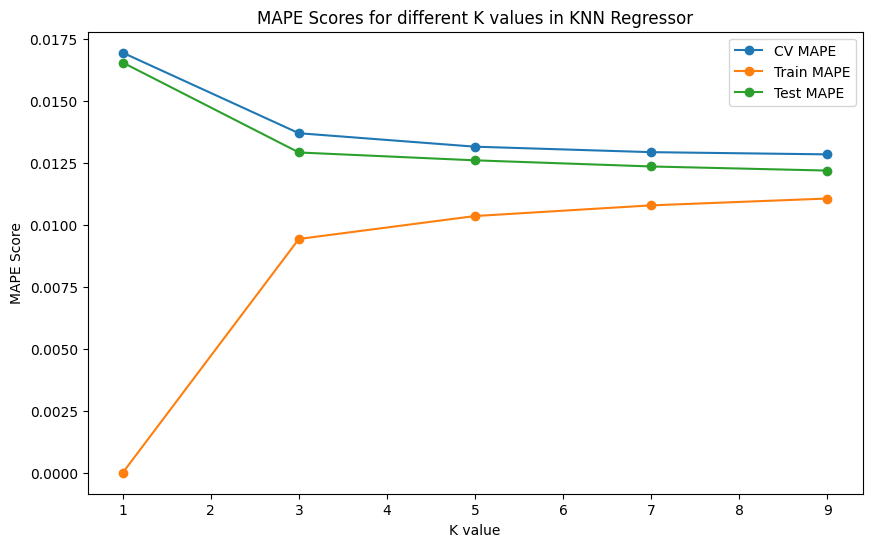

The best K value for CV is 9.


In [54]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

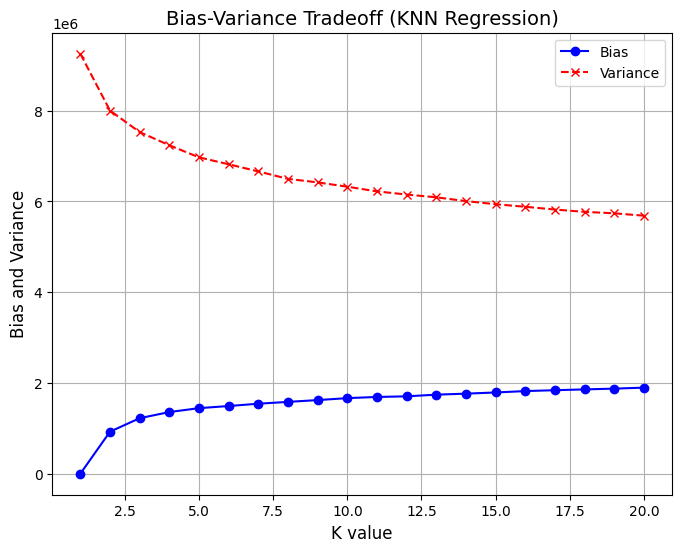

In [55]:

# Calculate bias and variance for KNN regression
k_values = np.arange(1, 21)
bias = []
variance = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model on the full training set
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)

    # Calculate bias and variance
    bias_value = np.mean((y_train - y_train_pred) ** 2)
    variance_value = np.mean((y_train_pred - np.mean(y_train_pred)) ** 2)
    
    bias.append(bias_value)
    variance.append(variance_value)

# Plot bias and variance for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, bias, label='Bias', color='blue', linestyle='-', marker='o')
plt.plot(k_values, variance, label='Variance', color='red', linestyle='--', marker='x')
plt.legend(fontsize=10)
plt.xlabel('K value', fontsize=12)
plt.ylabel('Bias and Variance', fontsize=12)
plt.title('Bias-Variance Tradeoff (KNN Regression)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()


In [56]:
# At k=10, they reach an impass.

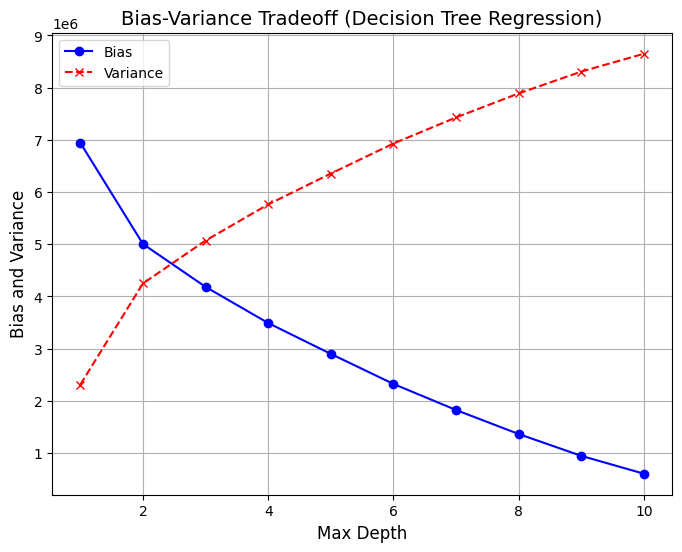

In [57]:
# Decision Tree

# Define a range of max depths to test
max_depths = np.arange(1, 11)
bias = []
variance = []

for max_depth in max_depths:
    # Create a Decision Tree regressor with the specified max depth
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=1)

    # Fit the model on the training data
    dt.fit(X_train, y_train)

    # Get predictions on the training data
    y_train_pred = dt.predict(X_train)

    # Calculate bias and variance
    bias_value = mean_squared_error(y_train, y_train_pred)
    variance_value = np.var(y_train_pred)

    bias.append(bias_value)
    variance.append(variance_value)

# Create a plot to visualize the bias-variance tradeoff
plt.figure(figsize=(8, 6))
plt.plot(max_depths, bias, label='Bias', color='blue', linestyle='-', marker='o')
plt.plot(max_depths, variance, label='Variance', color='red', linestyle='--', marker='x')
plt.legend(fontsize=10)
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Bias and Variance', fontsize=12)
plt.title('Bias-Variance Tradeoff (Decision Tree Regression)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()


In [58]:
# At max depth=2, they reach a tradeoff

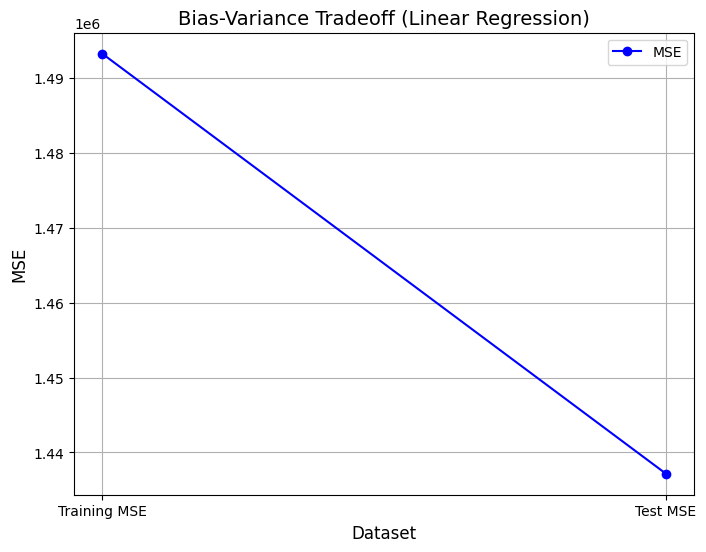

In [59]:
# Fit a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculate training MSE (bias)
y_train_pred = lr.predict(X_train)
training_mse = mean_squared_error(y_train, y_train_pred)

# Calculate test MSE (variance)
y_test_pred = lr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

# Create a line plot to visualize the bias-variance tradeoff
plt.figure(figsize=(8, 6))
plt.plot(['Training MSE', 'Test MSE'], [training_mse, test_mse], marker='o', linestyle='-', color='blue', label='MSE')
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Bias-Variance Tradeoff (Linear Regression)', fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

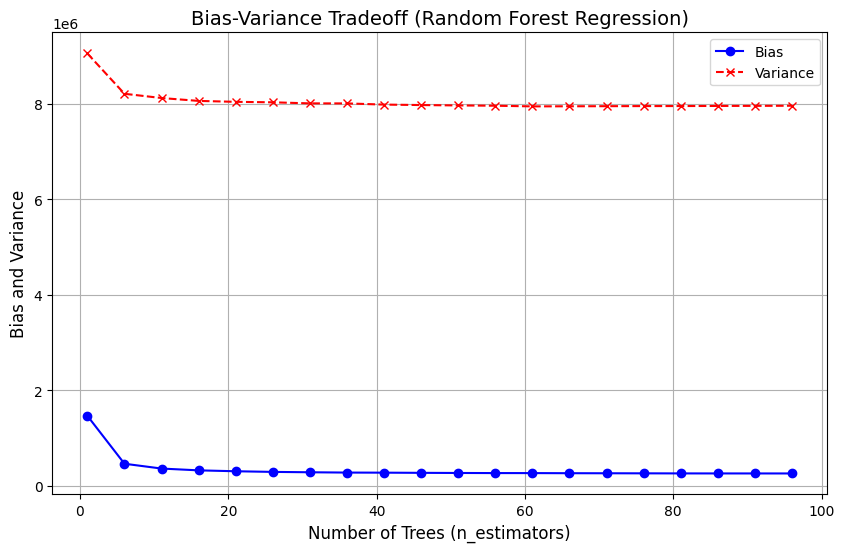

In [60]:
# Define a range of n_estimators (number of trees)
n_estimators_values = np.arange(1, 101, 5)
bias = []
variance = []

for n_estimators in n_estimators_values:
    # Create a Random Forest Regressor with the specified number of trees
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=1)

    # Fit the model on the training data
    rf.fit(X_train, y_train)

    # Get predictions on the training data
    y_train_pred = rf.predict(X_train)

    # Calculate bias and variance
    bias_value = mean_squared_error(y_train, y_train_pred)
    variance_value = np.var(y_train_pred)

    bias.append(bias_value)
    variance.append(variance_value)

# Create a plot to visualize the bias-variance tradeoff
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, bias, label='Bias', color='blue', linestyle='-', marker='o')
plt.plot(n_estimators_values, variance, label='Variance', color='red', linestyle='--', marker='x')
plt.legend(fontsize=10)
plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('Bias and Variance', fontsize=12)
plt.title('Bias-Variance Tradeoff (Random Forest Regression)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

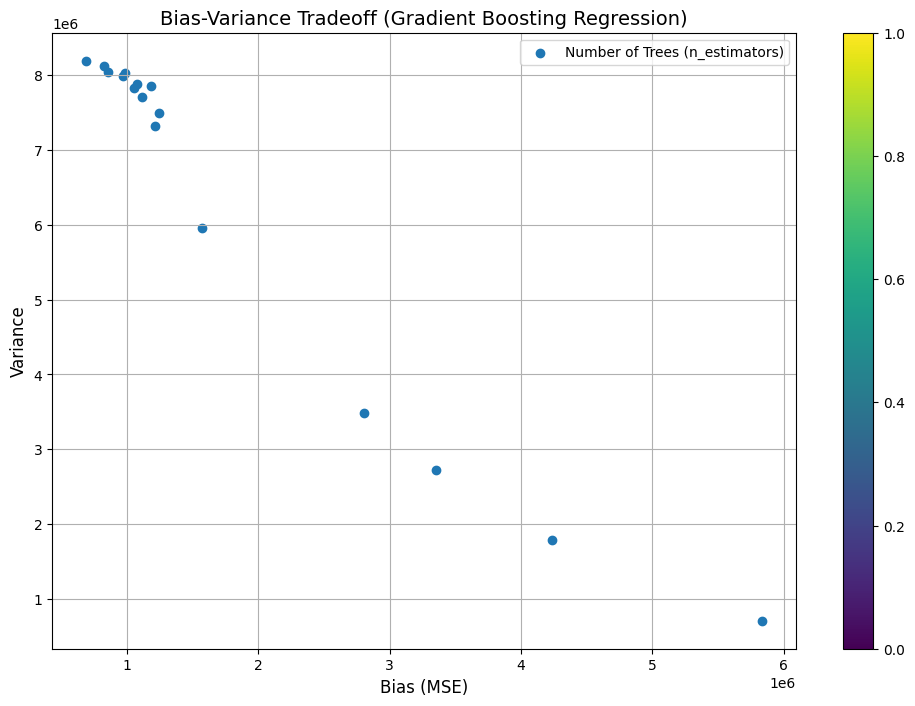

In [61]:
# Define a range of n_estimators and learning rates
n_estimators_values = [50, 100, 150, 200]
learning_rates = [0.01, 0.1, 0.2, 0.3]
bias = []
variance = []

for n_estimators in n_estimators_values:
    for learning_rate in learning_rates:
        # Create a Gradient Boosting Regressor with the specified parameters
        gb = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=1)

        # Fit the model on the training data
        gb.fit(X_train, y_train)

        # Get predictions on the training data
        y_train_pred = gb.predict(X_train)

        # Calculate bias and variance
        bias_value = mean_squared_error(y_train, y_train_pred)
        variance_value = np.var(y_train_pred)

        bias.append(bias_value)
        variance.append(variance_value)

# Create a plot to visualize the bias-variance tradeoff
plt.figure(figsize=(12, 8))
plt.scatter(bias, variance, label='Number of Trees (n_estimators)')
plt.colorbar()
plt.xlabel('Bias (MSE)', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.title('Bias-Variance Tradeoff (Gradient Boosting Regression)', fontsize=14)
plt.grid(True)

# Show the plot
plt.legend()
plt.show()